In [1]:
import matplotlib.pyplot as plt
import numpy as np
import numdifftools as nd  # See https://pypi.python.org/pypi/Numdifftools


# Vorticity 3D


\begin{aligned}{\vec {\omega }}=\nabla \times {\vec {v}}&={\begin{pmatrix}{\dfrac {\partial }{\partial x}}&\,{\dfrac {\partial }{\partial y}}&\,{\dfrac {\partial }{\partial z}}\end{pmatrix}}\times {\begin{pmatrix}v_{x}&v_{y}&v_{z}\end{pmatrix}}\\[6px]&={\begin{pmatrix}{\dfrac {\partial v_{z}}{\partial y}}-{\dfrac {\partial v_{y}}{\partial z}},&\quad {\dfrac {\partial v_{x}}{\partial z}}-{\dfrac {\partial v_{z}}{\partial x}},&\quad {\dfrac {\partial v_{y}}{\partial x}}-{\dfrac {\partial v_{x}}{\partial y}}\end{pmatrix}}\,.\end{aligned}


# Vorticity 2D ($x-y$)


\begin{aligned}
{\vec {\omega }}=\nabla \times {\vec {v}}&={\begin{pmatrix}{\dfrac {\partial }{\partial x}}&\,{\dfrac {\partial }{\partial y}}\end{pmatrix}}\times {\begin{pmatrix}v_{x}&v_{y}\end{pmatrix}}\\[6px]&={\begin{pmatrix}{\dfrac {\partial v_{z}}{\partial y}}-{\dfrac {\partial v_{y}}{\partial z}},&\quad {\dfrac {\partial v_{x}}{\partial z}}-{\dfrac {\partial v_{z}}{\partial x}},&\quad {\dfrac {\partial v_{y}}{\partial x}}-{\dfrac {\partial v_{x}}{\partial y}}\end{pmatrix}}\,.\end{aligned}


# Vorticity 2D ($x-y$)

\begin{aligned}
{\vec {\omega }}=\nabla \times {\vec {v}}&={\begin{pmatrix}{\dfrac {\partial }{\partial x}}&\,{\dfrac {\partial }{\partial y}}\end{pmatrix}}\times {\begin{pmatrix}v_{x}&v_{y}\end{pmatrix}}
\\[6px]&={\begin{pmatrix}  {\dfrac {\partial v_{y}}{\partial x}}-{\dfrac {\partial v_{x}}{\partial y}}\end{pmatrix}}\,.\end{aligned}

In [6]:
def poiseuille(y,R=1,dpdx=-0.01,nu=0.01):
  
#   r = np.linspace(-R,R,Nr)
  u = -1/4/nu *dpdx*(R**2-y**2)

  return u

In [20]:
x, y    = np.meshgrid(np.arange(0, 1, 0.05),
                      np.arange(-1, 1, 0.1))

u = poiseuille(y)


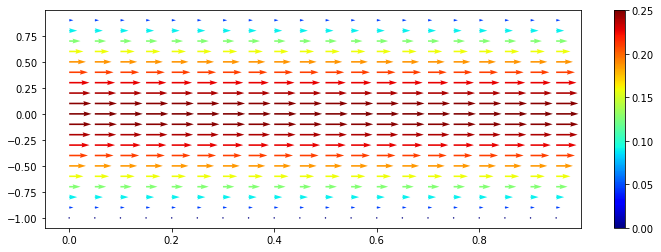

In [19]:
fig, ax = plt.subplots(figsize=(12,4))

m = np.sqrt(np.power(u, 2) + np.power(v, 2))

figure = ax.quiver(x, y, u, v,m,cmap='jet')
cb = fig.colorbar(figure)


In [ ]:
Re

In [ ]:
r

In [ ]:
u

In [ ]:
Re = []
profile = []

for dpdx in np.linspace(-0.001,-0.01,1000):
  re, r, u = poiseuille(dpdx=dpdx,figure=False,Nr=10)
  Re.append([re]),
  profile.append(u)
profile = np.array(profile)
Re      = np.array(Re)

In [ ]:
Re

In [ ]:
profile

In [ ]:
scaler_profile  = np.max(profile)
scaler_reynolds = np.max(Re)
profile_scaled  = profile/scaler_profile
Re_scaled       = Re/scaler_reynolds

In [ ]:
fig, ax = plt.subplots(figsize=(10,4))
for i in range(10):
  ax.plot(profile[-i,:])

In [ ]:
fig, ax = plt.subplots(figsize=(10,4))
for i in range(10):
  ax.plot(profile_scaled[-i,:])

In [ ]:
X_train, X_test, y_train, y_test  = train_test_split(Re_scaled,profile_scaled)

In [ ]:
X_test

In [ ]:
y_test

In [ ]:
model = keras.Sequential()
model.add(keras.Input(shape=1))
model.add(layers.Dense(20,activation='leaky_relu',use_bias=True)) 
model.add(layers.Dense(10,activation='leaky_relu',use_bias=False)) 
model.compile(loss='MSE',optimizer=keras.optimizers.SGD(learning_rate=0.0001))
model.summary()

In [ ]:
problem = model.fit(X_train,
                    y_train,
                    epochs=500,
                    verbose=False)
plt.plot(problem.history['loss'])

In [ ]:
p_profile = model.predict([50]/scaler_reynolds)
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(r,p_profile.flatten()*scaler_profile ,'r-o')
ax.plot(r,profile[-1] ,'k-')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


In [ ]:
!ls drive/MyDrive/Poiseuille/

In [ ]:
# model.save('./drive/MyDrive/Poiseuille/h5/Poiseuille.h5')

In [ ]:
np.savetxt("./drive/MyDrive/Poiseuille/data/Re.txt",Re)
np.savetxt("./drive/MyDrive/Poiseuille/data/Profile.txt",profile)
np.savetxt("./drive/MyDrive/Poiseuille/data/r.txt",r)
np.savetxt("./drive/MyDrive/Poiseuille/data/X_train.txt",X_train)
np.savetxt("./drive/MyDrive/Poiseuille/data/X_test.txt",X_test)
np.savetxt("./drive/MyDrive/Poiseuille/data/y_train.txt",y_train)
np.savetxt("./drive/MyDrive/Poiseuille/data/y_test.txt",y_test)